In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
T = 10000
N = [10,20,50,100,200,500,800,1000]
b = 3
Q2_mean = []
Q2_theory = []
Rg2_mean = []
Rg2_theory = []
for n in N:
    x,y,z = np.zeros([T,n+1]),np.zeros([T,n+1]),np.zeros([T,n+1])
    with open(f'simulation_FJC_b=3.0_N={n}_T=10000.xyz','r') as f:
        for t in range(T):
            line1 = f.readline()
            line2 = f.readline()
            for i in range(n+1):
                data = f.readline()
                values = data.split( )
                x[t,i] = float(values[1])
                y[t,i] = float(values[2])
                z[t,i] = float(values[3])

    Q2 = []
    for i in range(T):
        Q2.append((x[i,-1]-x[i,0])**2 + (y[i,-1]-y[i,0])**2 + (z[i,-1]-z[i,0])**2)
    Q2_est = np.mean(Q2)
    Q2_mean.append(Q2_est)
    Q2_theory.append(n*b*b)

    Rg2 = []
    for i in range(T):
        x_cm = np.mean(x[i,:])
        y_cm = np.mean(y[i,:])
        z_cm = np.mean(z[i,:])
        rg_2 = np.mean((x[i,:]-x_cm)**2 + (y[i,:]-y_cm)**2 + (z[i,:]-z_cm)**2)
        Rg2.append(rg_2)
    Rg2_est = np.mean(Rg2)
    Rg2_mean.append(Rg2_est)
    Rg2_theory.append(n*b*b/6)

## Q_2

Text(0, 0.5, '<Q**2>')

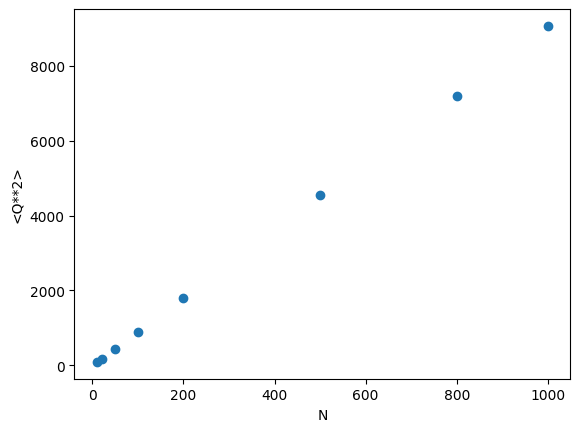

In [3]:
plt.scatter(N,Q2_mean)
plt.xlabel('N')
plt.ylabel('<Q**2>')

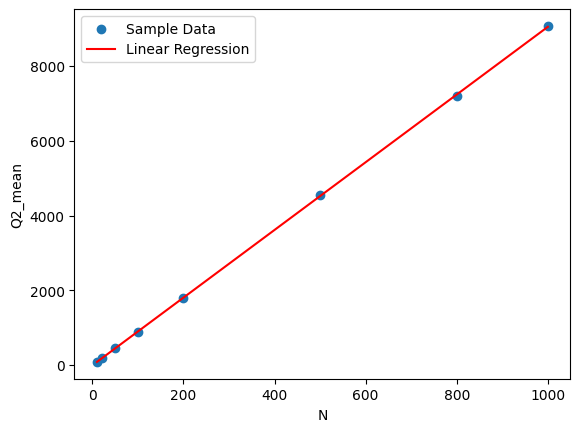

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(N).reshape(-1, 1),np.array(Q2_mean).reshape(-1, 1))
#slope,test = model.coef_[0][0]
plt.scatter(N, Q2_mean, label='Sample Data')
plt.plot(N, model.predict(np.array(N).reshape(-1, 1)), 'r-', label='Linear Regression')
plt.xlabel('N')
plt.ylabel('Q2_mean')
plt.legend()
plt.show()

In [5]:
score = model.score(np.array(N).reshape(-1, 1),np.array(Q2_mean).reshape(-1, 1))
score

0.999969839986885

In [6]:
intercept = model.fit(np.array(N).reshape(-1, 1),np.array(Q2_mean).reshape(-1, 1)).intercept_
intercept

array([-5.60351297])

In [7]:
slope = model.coef_[0][0] #Slope-Close to b**2
slope

9.053726624280864

## Rg_2

Text(0, 0.5, '<Rg**2>')

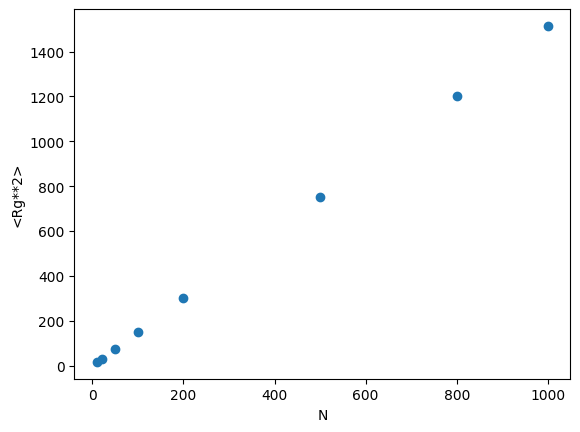

In [22]:
plt.scatter(N,Rg2_mean)
plt.xlabel('N')
plt.ylabel('<Rg**2>')

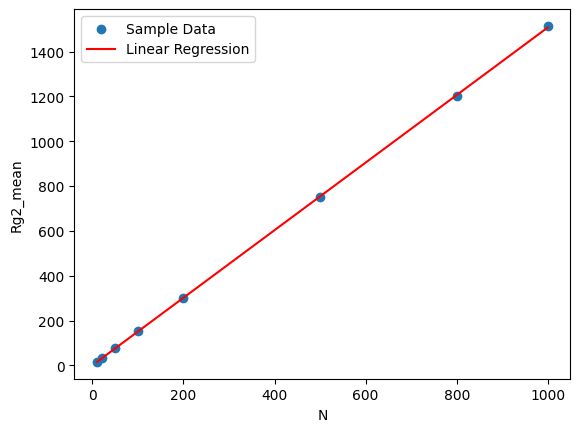

In [23]:
model1 = LinearRegression()
model1.fit(np.array(N).reshape(-1, 1),np.array(Rg2_mean).reshape(-1, 1))
plt.scatter(N, Rg2_mean, label='Sample Data')
plt.plot(N, model1.predict(np.array(N).reshape(-1, 1)), 'r-', label='Linear Regression')
plt.xlabel('N')
plt.ylabel('Rg2_mean')
plt.legend()
plt.show()

In [24]:
Rg2_mean

[16.379697660213225,
 31.256952069297956,
 75.98432838722862,
 151.34915781201727,
 302.31210429790707,
 750.4937415036698,
 1199.7326719437956,
 1514.1557294601596]

In [25]:
Rg2_theory

[15.0, 30.0, 75.0, 150.0, 300.0, 750.0, 1200.0, 1500.0]

In [26]:
score = model1.score(np.array(N).reshape(-1, 1),np.array(Rg2_mean).reshape(-1, 1))
score

0.9999586704177874

In [27]:
intercept = model1.fit(np.array(N).reshape(-1, 1),np.array(Rg2_mean).reshape(-1, 1)).intercept_
intercept

array([0.26681119])

In [28]:
slope = model1.coef_[0][0] #Slope-Close to b**2/6
slope

1.5072872737229017

## Relative error in Q_2

In [13]:
T=[10,100,1000,10000,100000]
N = 100
b = 3
Q2_mean = []
Q2_theory = []
for j in T:
    x,y,z = np.zeros([j,N+1]),np.zeros([j,N+1]),np.zeros([j,N+1])
    with open(f'simulation_FJC_b=3.0_N=100_T={j}.xyz','r') as f:
        for t in range(j):
            line1 = f.readline()
            line2 = f.readline()
            for i in range(N+1):
                data = f.readline()
                values = data.split( )
                x[t,i] = float(values[1])
                y[t,i] = float(values[2])
                z[t,i] = float(values[3])

    Q2 = []
    for i in range(j):
        Q2.append(((x[i,-1]-x[i,0])**2 + (y[i,-1]-y[i,0])**2 + (z[i,-1]-z[i,0])**2))
    Q_est = np.mean(Q2)
    Q2_mean.append(Q_est)
    Q2_theory.append(N*b*b)

rel_error_Q = []
for i in range(len(Q2_mean)):
    error = np.abs(Q2_mean[i]-Q2_theory[i])/Q2_theory[i]
    rel_error_Q.append(error)

Text(0, 0.5, 'Relative error in Q')

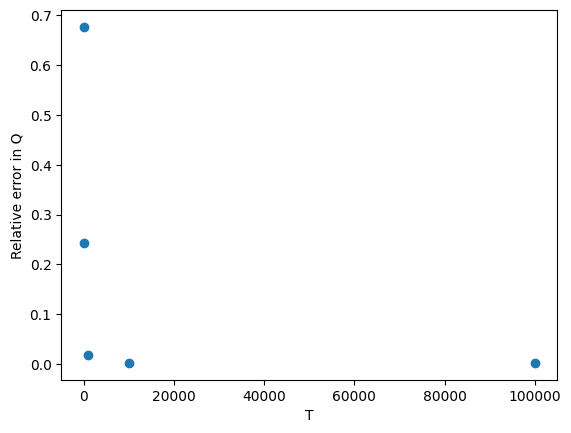

In [14]:
plt.scatter(T,rel_error_Q)
plt.xlabel('T')
plt.ylabel('Relative error in Q')